In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [115]:
df = pd.read_csv("/Users/aimaldastagirzada/Downloads/kc_house_data.csv")

In [116]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [118]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [119]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


<Axes: xlabel='sqft_lot', ylabel='price'>

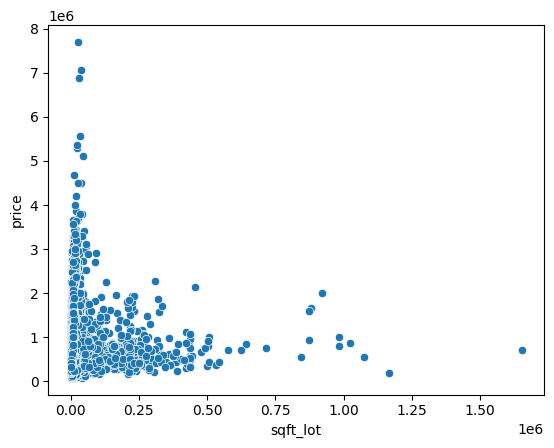

In [120]:
sns.scatterplot(x='sqft_lot', y='price',data=df)

<Axes: xlabel='price', ylabel='Count'>

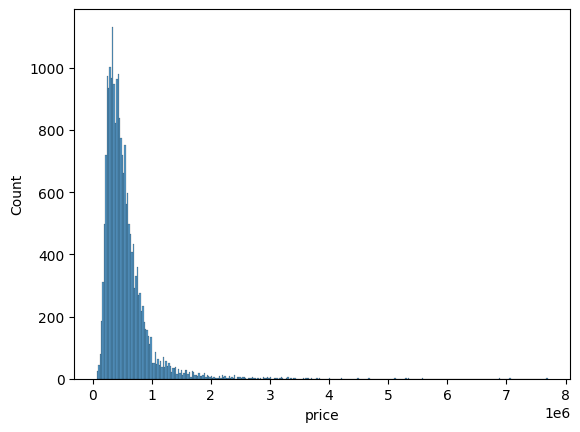

In [121]:
sns.histplot(df['price'])

<Axes: xlabel='view', ylabel='Count'>

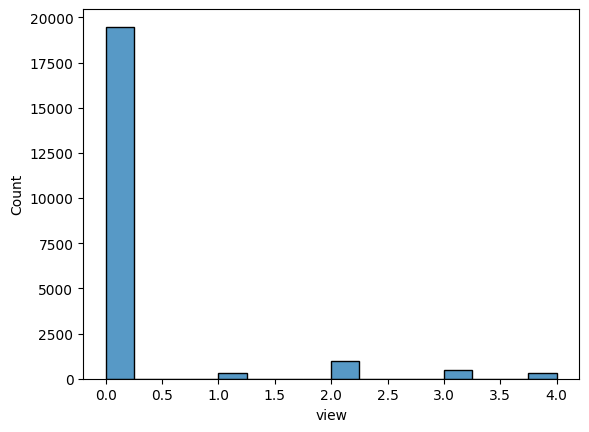

In [122]:
sns.histplot(df['view'])

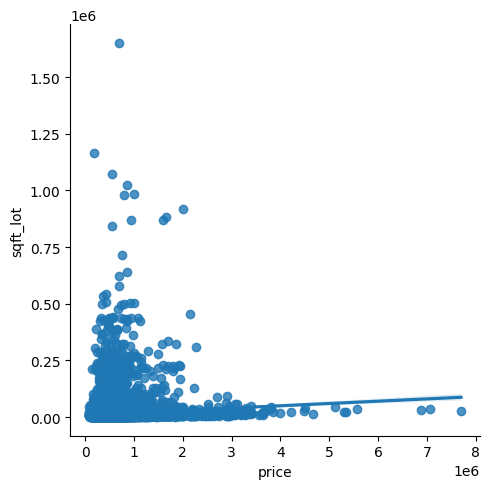

In [123]:
sns.lmplot(x='price',y= 'sqft_lot',data=df)

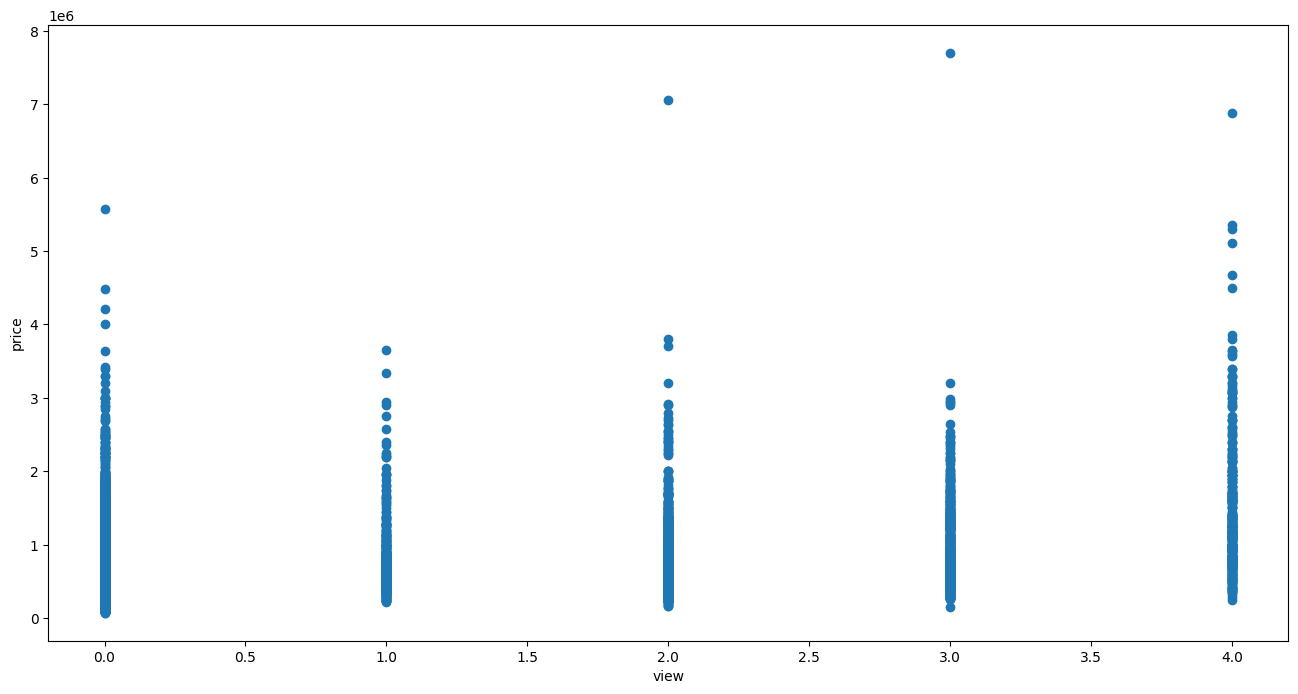

In [124]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['view'], df['price'])
ax.set_xlabel('view')
ax.set_ylabel('price')
plt.show()

In [125]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [126]:
results = ols("price ~ bedrooms + view + sqft_lot", data= df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     2246.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:33:15   Log-Likelihood:            -3.0467e+05
No. Observations:               21613   AIC:                         6.093e+05
Df Residuals:                   21609   BIC:                         6.094e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.225e+05   8216.179     14.915      0.0

In [127]:
"y_hat = 1.1225e+05 + 1.094e+05 bedrooms + 1.1779e+05view + 0.4710sqft_lot"

'y_hat = 1.1225e+05 + 1.094e+05 bedrooms + 1.1779e+05view + 0.4710sqft_lot'

In [128]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [129]:
1.1225e+05 + 1.094e+05*(3) + 1.1779e+05*(0) + 0.4710*(5650)

443111.15

In [130]:
pred_vals = results.predict(df[['bedrooms','view','sqft_lot']])

In [131]:
pred_vals

0        453389.470816
1        454139.252026
2        346043.041946
3        562478.481644
4        454533.923290
             ...      
21608    451261.165989
21609    562861.378706
21610    341969.167912
21611    451853.172886
21612    341840.122654
Length: 21613, dtype: float64

In [132]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [133]:
res

,y_hat,price
0,453389.470816,221900.0
1,454139.252026,538000.0
2,346043.041946,180000.0
3,562478.481644,604000.0
4,454533.923290,510000.0
...,...,...
21608,451261.165989,360000.0
21609,562861.378706,400000.0
21610,341969.167912,402101.0
21611,451853.172886,400000.0


In [134]:
res['error'] = res['y_hat'] - res['price']

In [135]:
res.head(1)

,y_hat,price,error
0,453389.470816,221900.0,231489.470816


In [136]:
res['sq_error'] = res['error']**2

In [137]:
np.sqrt(res['sq_error'].mean())

320524.8607556991

In [138]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


(array([2.0000e+00, 2.0000e+00, 4.0000e+00, 1.2000e+01, 8.3000e+01,
        5.2100e+02, 1.8348e+04, 2.6400e+03, 0.0000e+00, 1.0000e+00]),
 array([-6374465.59493727, -5427478.18420906, -4480490.77348085,
        -3533503.36275264, -2586515.95202443, -1639528.54129623,
         -692541.13056802,   254446.28016019,  1201433.6908884 ,
         2148421.10161661,  3095408.51234481]),
 <BarContainer object of 10 artists>)

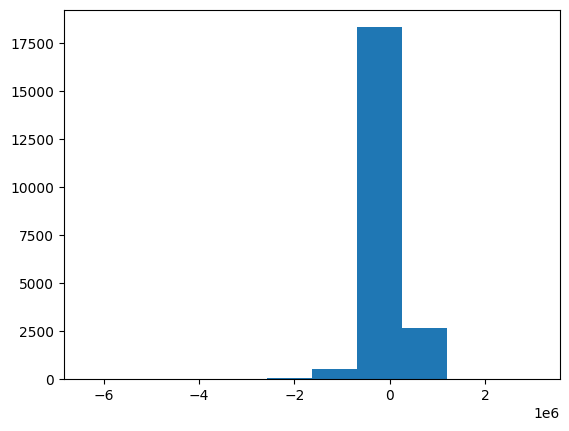

In [139]:
plt.hist(res['error'])


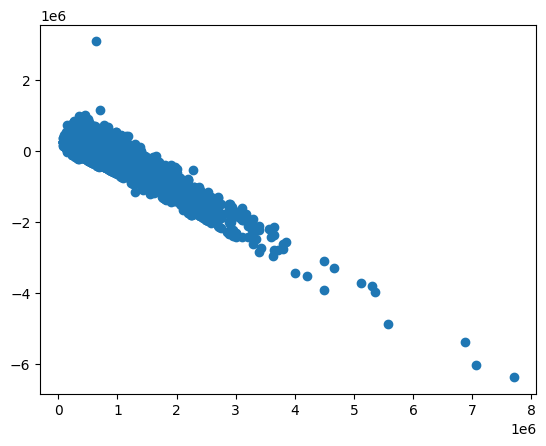

In [140]:
plt.scatter(df['price'],res['error'])

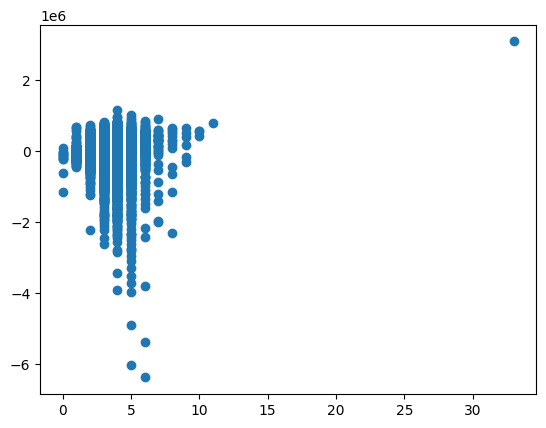

In [141]:
plt.scatter(df['bedrooms'],res['error'])

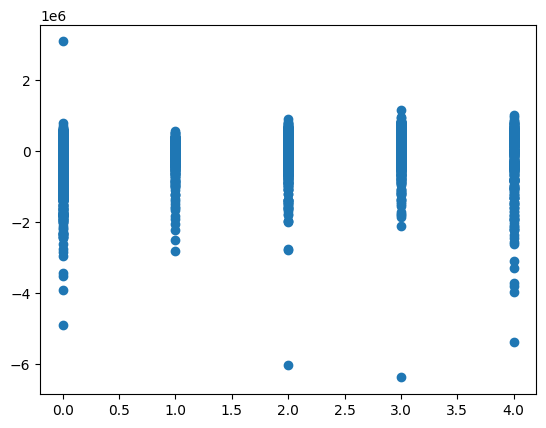

In [142]:
plt.scatter(df['view'],res['error'])

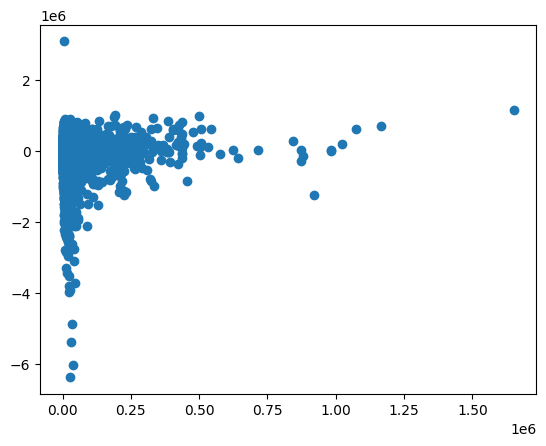

In [143]:
plt.scatter(df['sqft_lot'],res['error'])

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([-6374465.59493727, -6019654.49171085, -5379814.23992095, ...,
          1016102.52257619,  1171482.81003598,  3095408.51234481])),
 (284005.38370360265, -4.4931600128803615e-07, 0.8859057890661434))

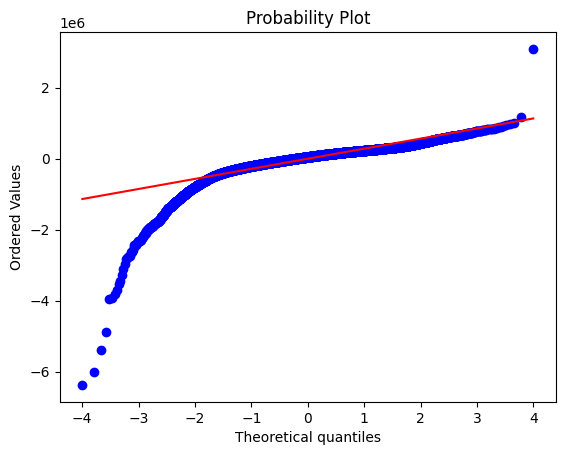

In [144]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [145]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_bedrooms  dfb_view  dfb_sqft_lot       cooks_d   
0          -0.003258      0.001820  0.001277      0.000965  7.680871e-06  \
1           0.001176     -0.000661 -0.000468     -0.000281  9.971969e-07   
2          -0.005949      0.005117  0.000649      0.000222  9.972599e-06   
3          -0.000324      0.000625 -0.000302     -0.000212  3.193749e-07   
4           0.000776     -0.000438 -0.000311     -0.000162  4.341563e-07   
...              ...           ...       ...           ...           ...   
21608      -0.001298      0.000712  0.000488      0.000592  1.245313e-06   
21609       0.001275     -0.002449  0.001188      0.000762  4.886415e-06   
21610       0.002172     -0.001846 -0.000216     -0.000348  1.336541e-06   
21611      -0.000735      0.000405  0.000280      0.000303  3.966720e-07   
21612      -0.000608      0.000517  0.000060      0.000100  1.049417e-07   

       standard_resid  hat_diag  dffits_internal  student_resid    dffits  
0          

In [146]:
infl.summary_frame()

,dfb_Intercept,dfb_bedrooms,dfb_view,dfb_sqft_lot,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.003258,0.001820,0.001277,0.000965,7.680871e-06,-0.722174,0.000059,-0.005543,-0.722166,-0.005543
1,0.001176,-0.000661,-0.000468,-0.000281,9.971969e-07,0.261619,0.000058,0.001997,0.261613,0.001997
2,-0.005949,0.005117,0.000649,0.000222,9.972599e-06,-0.518025,0.000149,-0.006316,-0.518017,-0.006316
3,-0.000324,0.000625,-0.000302,-0.000212,3.193749e-07,0.129535,0.000076,0.001130,0.129532,0.001130
4,0.000776,-0.000438,-0.000311,-0.000162,4.341563e-07,0.173037,0.000058,0.001318,0.173033,0.001318
...,...,...,...,...,...,...,...,...,...,...
21608,-0.001298,0.000712,0.000488,0.000592,1.245313e-06,-0.284707,0.000061,-0.002232,-0.284700,-0.002232
21609,0.001275,-0.002449,0.001188,0.000762,4.886415e-06,-0.508081,0.000076,-0.004421,-0.508072,-0.004421
21610,0.002172,-0.001846,-0.000216,-0.000348,1.336541e-06,0.187601,0.000152,0.002312,0.187597,0.002312
21611,-0.000735,0.000405,0.000280,0.000303,3.966720e-07,-0.161766,0.000061,-0.001260,-0.161762,-0.001260


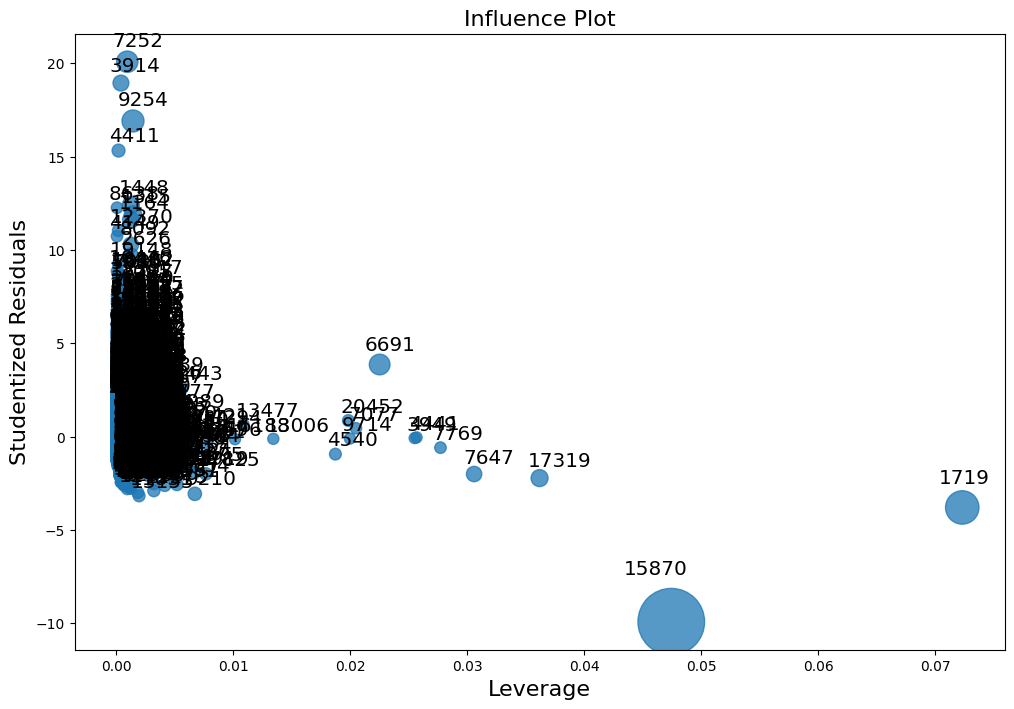

In [147]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [148]:
res

,y_hat,price,error,sq_error
0,453389.470816,221900.0,231489.470816,5.358738e+10
1,454139.252026,538000.0,-83860.747974,7.032625e+09
2,346043.041946,180000.0,166043.041946,2.757029e+10
3,562478.481644,604000.0,-41521.518356,1.724036e+09
4,454533.923290,510000.0,-55466.076710,3.076486e+09
...,...,...,...,...
21608,451261.165989,360000.0,91261.165989,8.328600e+09
21609,562861.378706,400000.0,162861.378706,2.652383e+10
21610,341969.167912,402101.0,-60131.832088,3.615837e+09
21611,451853.172886,400000.0,51853.172886,2.688752e+09


In [150]:
dummies_view = pd.get_dummies(df.view, dtype=int)

In [151]:
df['view'].unique()

array([0, 3, 4, 2, 1])

In [152]:
dummies_view.rename(columns = {0: 'Terrible', 1: 'Mediocre', 2: 'Okay', 3: 'Decent', 4: 'Great'}, inplace = True)

In [153]:
df = pd.concat([df,dummies_view], axis=1)

In [154]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,Terrible,Mediocre,Okay,Decent,Great
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,1,0,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,1,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,1,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,1,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,98103,47.6993,-122.346,1530,1509,1,0,0,0,0
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,98146,47.5107,-122.362,1830,7200,1,0,0,0,0
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,98144,47.5944,-122.299,1020,2007,1,0,0,0,0
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,98027,47.5345,-122.069,1410,1287,1,0,0,0,0


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [156]:
df['date'] = pd.to_datetime(df['date'])

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [183]:
daily_dataset = df.set_index('date').resample("W").agg({'price':'mean','bedrooms':'mean','view':'mean','sqft_lot':'mean'}).ffill()

In [184]:
daily_dataset

,price,bedrooms,view,sqft_lot
date,,,,
2014-05-04,5.264497e+05,3.368421,0.223684,14754.355263
2014-05-11,5.434787e+05,3.421911,0.188811,18398.060606
2014-05-18,5.572634e+05,3.429268,0.197561,13916.278049
2014-05-25,5.271312e+05,3.330579,0.301653,17241.295455
2014-06-01,5.792272e+05,3.390957,0.308511,13874.694149
2014-06-08,5.444525e+05,3.379386,0.199561,13037.914474
2014-06-15,5.660363e+05,3.411135,0.235546,14671.850107
2014-06-22,5.870153e+05,3.484171,0.256983,13292.614525
2014-06-29,5.299830e+05,3.402516,0.267296,15837.028302


In [185]:
results = ols("price ~ bedrooms + view + sqft_lot", data= daily_dataset).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     34.39
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           1.76e-12
Time:                        21:43:21   Log-Likelihood:                -709.50
No. Observations:                  57   AIC:                             1427.
Df Residuals:                      53   BIC:                             1435.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.869e+05   1.42e+05     -2.026      0.0

In [186]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [187]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [190]:
categorical_features = ['view']
numerical_features = ['bedrooms','sqft_lot']
target = 'price'

In [191]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)

In [192]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [193]:
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [194]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [195]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'sqft_lot'])])),
                ('regressor', LinearRegression())])

In [196]:
pred = linear_regression.predict(X_test)

In [197]:
pred

array([457793., 458529., 686624., ..., 565296., 456520., 564863.])

In [198]:
from sklearn.metrics import mean_squared_error

In [199]:
np.sqrt(mean_squared_error(pred,y_test))

308644.91969575227

In [200]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [201]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'sqft_lot'])])),
                ('regressor', Ridge(alpha=3.0))])

In [202]:
pred_ridge = ridge_regression.predict(X_test)

selected becasue it keeps the selected model 

In [203]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

308614.6656792549

In [204]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [205]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'sqft_lot'])])),
                ('regressor', Lasso())])

In [206]:
lasso_pred = lasso_regression.predict(X_test)

In [207]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

308641.3364038977

In [208]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [209]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'sqft_lot'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [210]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [211]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

326990.09708116244

In [227]:
elastic_net_pred = pd.concat([pd.DataFrame(elasticnet_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)


In [233]:
elastic_net_pred['res'] = elastic_net_pred['pred'] - elastic_net_pred['price']


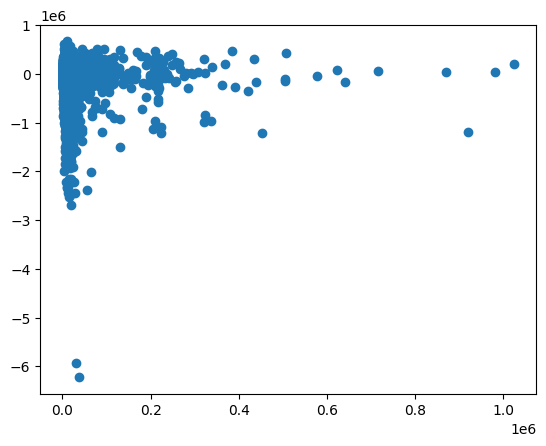

In [234]:
import matplotlib.pyplot as plt
plt.scatter(X_test['sqft_lot'],elastic_net_pred['res'])

In [230]:
lasso_net_pred = pd.concat([pd.DataFrame(lasso_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)



''

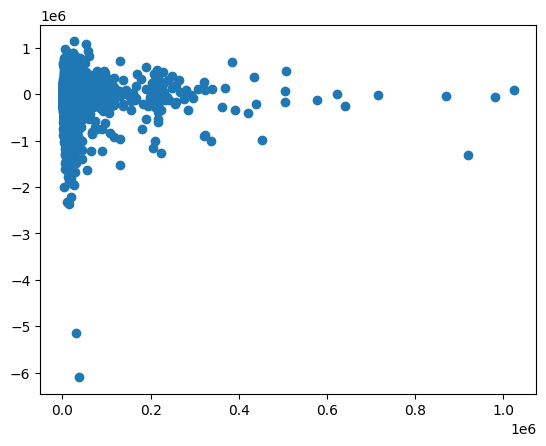

In [242]:
lasso_net_pred['res'] = lasso_net_pred['pred'] - lasso_net_pred['price']

plt.scatter(X_test['sqft_lot'],lasso_net_pred['res'])
""

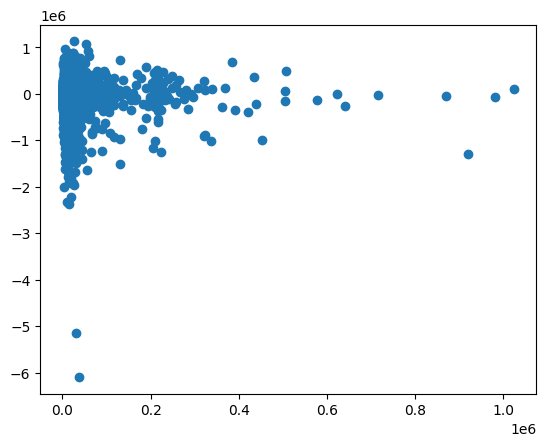

In [245]:
ridge_net_pred = pd.concat([pd.DataFrame(pred_ridge).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
ridge_net_pred['res'] = ridge_net_pred['pred'] - ridge_net_pred['price']
plt.scatter(X_test['sqft_lot'],ridge_net_pred['res'])

